In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load result files

In [4]:
df_game_start_difference = pd.read_pickle("result/baseline.pkl")  
df_game_start_difference.head()

,0
0,0.000897
1,-0.002430
2,0.098794
3,-0.029484
4,0.064817


In [5]:
df_game_start_difference_post_strata = pd.read_pickle("result/model2.pkl")  
df_game_start_difference_post_strata.head()

,0
0,-0.020357
1,-0.012170
2,0.020189
3,0.059806
4,-0.045635


In [3]:
df_game_start_difference_cuped = pd.read_pickle("result/model3.pkl")  
df_game_start_difference_cuped.head()

,0
0,-0.028734
1,0.010716
2,-0.003132
3,0.067490
4,0.023743


In [6]:
df_game_start_difference_cuped_ml = pd.read_pickle("result/model4.pkl")  
df_game_start_difference_cuped_ml.head()

,0
0,0.003281
1,-0.018479
2,0.020643
3,-0.069171
4,-0.004887


In [7]:
df_game_start_difference_cupac_no_split = pd.read_pickle("result/model5.pkl")  
df_game_start_difference_cupac_no_split.head()

,0
0,0.035456
1,-0.054470
2,0.037608
3,0.089280
4,-0.024994


In [9]:
df_game_start_difference_cupac_pre_data_0 = pd.read_pickle("result/model6.pkl")  
df_game_start_difference_cupac_pre_data_0.head()

,0
0,-0.024966
1,0.049185
2,-0.001612
3,0.032986
4,0.005669


In [11]:
df_game_start_difference_cupac_feature_selection = pd.read_pickle("result/model7.pkl")  
df_game_start_difference_cupac_feature_selection.head()

,0
0,-0.055616
1,-0.002725
2,0.026747
3,-0.031791
4,-0.011648


## Visualisation -  all models

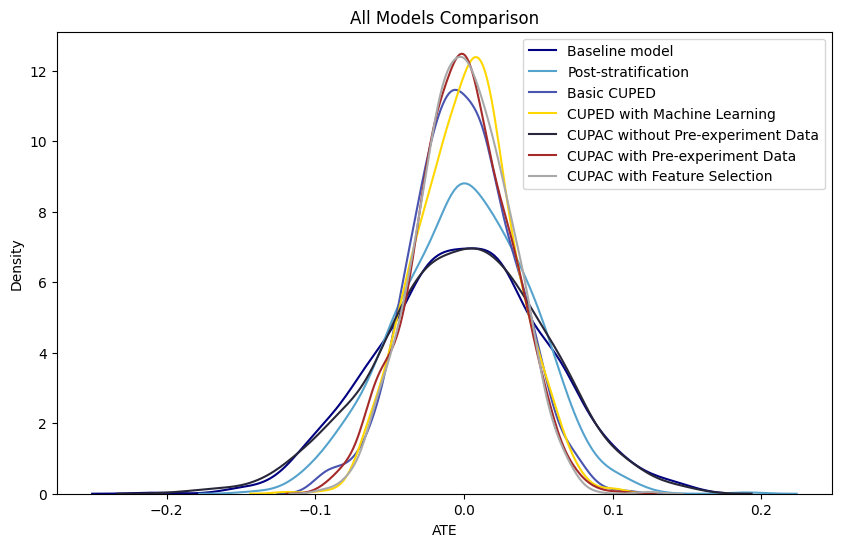

In [40]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.set_palette(sns.color_palette("icefire"))

sns.kdeplot(df_game_start_difference[0], label='Baseline model',color='navy')
sns.kdeplot(df_game_start_difference_post_strata[0], label='Post-stratification')
sns.kdeplot(df_game_start_difference_cuped[0], label='Basic CUPED')
sns.kdeplot(df_game_start_difference_cuped_ml[0], label='CUPED with Machine Learning', color='gold')
sns.kdeplot(df_game_start_difference_cupac_no_split[0], label='CUPAC without Pre-experiment Data')
sns.kdeplot(df_game_start_difference_cupac_pre_data_0[0], label='CUPAC with Pre-experiment Data', color='brown')
sns.kdeplot(df_game_start_difference_cupac_feature_selection[0], label='CUPAC with Feature Selection',color='darkgray')

plt.xlabel('ATE')
plt.ylabel('Density')
plt.title('All Models Comparison')
plt.legend()

plt.show()

In [13]:
# Calculate the variance for each dataframe
variances = {
    'baseline model': df_game_start_difference.var().values[0],
    'post stratification': df_game_start_difference_post_strata.var().values[0],
    'CUPED': df_game_start_difference_cuped.var().values[0],
    'CUPED_ml': df_game_start_difference_cuped_ml.var().values[0],
    'CUPAC': df_game_start_difference_cupac_no_split.var().values[0],
    'CUPAC_pre_data_is_0': df_game_start_difference_cupac_pre_data_0.var().values[0],
    'CUPAC_feature_selected': df_game_start_difference_cupac_feature_selection.var().values[0]
}

means = {
    'baseline model': df_game_start_difference.mean().values[0],
    'post stratification': df_game_start_difference_post_strata.mean().values[0],
    'CUPED': df_game_start_difference_cuped.mean().values[0],
    'CUPED_ml': df_game_start_difference_cuped_ml.mean().values[0],
    'CUPAC': df_game_start_difference_cupac_no_split.mean().values[0],
    'CUPAC_pre_data_is_0': df_game_start_difference_cupac_pre_data_0.mean().values[0],
    'CUPAC_feature_selected': df_game_start_difference_cupac_feature_selection.mean().values[0]
}


# Create a DataFrame to display the variances
variance_df = pd.DataFrame(list(variances.items()), columns=['Model', 'Variance'])

def variance_reduction(baseline, model_variance):
    return ((baseline - model_variance) / baseline) * 100

# Calculate variance reduction for each model
variance_reduction_percentages = {
    model: variance_reduction(variance_df['Variance'][0], variance)
    for model, variance in variances.items()
}

# Add the variance reduction percentages to the DataFrame
variance_df['Variance Reduction (%)'] = variance_df['Model'].map(variance_reduction_percentages)



variance_df['Mean'] = variance_df['Model'].map(means)
def mean_uplift(baseline, model_mean):
    return ((baseline - model_mean) / baseline) * 100

# Calculate mean change for each model
mean_percentages = {
    model: mean_uplift(variance_df['Mean'][0], mean)
    for model, mean in means.items()
}
variance_df['Mean Change (%)'] = variance_df['Model'].map(mean_percentages)

variance_df


,Model,Variance,Variance Reduction (%),Mean,Mean Change (%)
0,baseline model,0.002997,0.000000,-0.000953,-0.000000
1,post stratification,0.001997,33.372574,-0.000463,51.373255
2,CUPED,0.001154,61.480803,-0.001225,-28.546257
3,CUPED_ml,0.001037,65.405063,0.000850,189.143956
4,CUPAC,0.003043,-1.542138,-0.000866,9.115101
5,CUPAC_pre_data_is_0,0.001041,65.271019,-0.002028,-112.778525
6,CUPAC_feature_selected,0.000938,68.693642,-0.000470,50.700868


## Visualisation - selected models

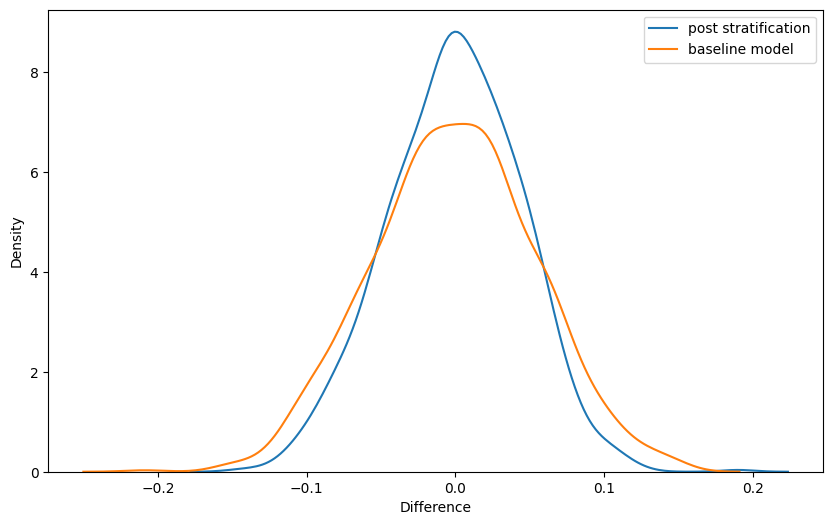

In [28]:

plt.figure(figsize=(10, 6))

sns.kdeplot(df_game_start_difference_post_strata[0], label='post stratification')
sns.kdeplot(df_game_start_difference[0], label='baseline model')

palette = sns.color_palette("tab20b", as_cmap=True)


# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
# plt.title('A/A Test Results comparison -  basline and post-stratification models')
plt.legend()

# Show the plot
plt.show()

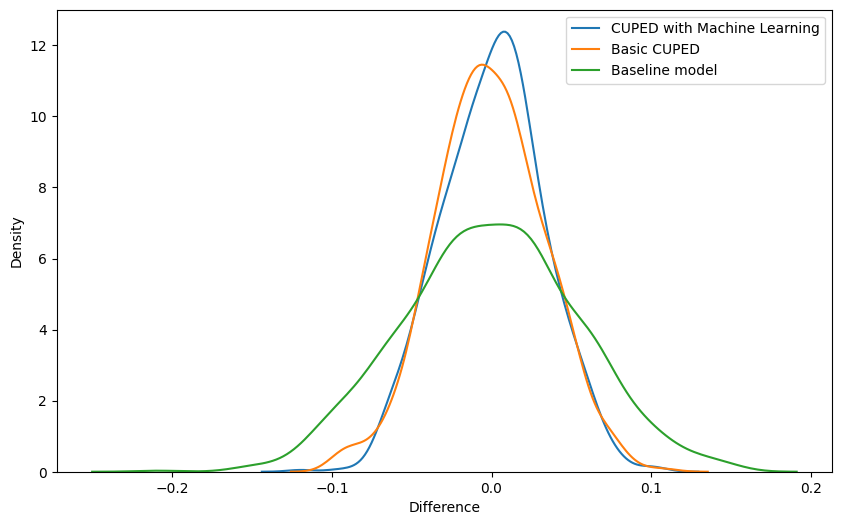

In [11]:
# Create a KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df_game_start_difference_cuped_ml[0], label='CUPED with Machine Learning')
sns.kdeplot(df_game_start_difference_cuped[0], label='Basic CUPED')
sns.kdeplot(df_game_start_difference[0], label='Baseline model')


palette = sns.color_palette("tab20b", as_cmap=True)


# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
# plt.title('A/A Test Results comparison -  basline and post-stratification models')
plt.legend()

# Show the plot
plt.show()

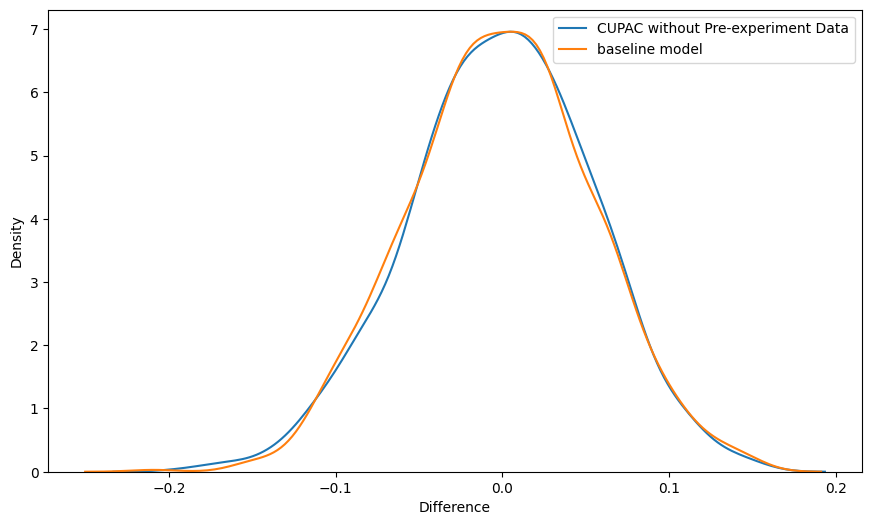

In [35]:
# Create a KDE plot
plt.figure(figsize=(10.5, 6))

sns.kdeplot(df_game_start_difference_cupac_no_split[0], label='CUPAC without Pre-experiment Data')
sns.kdeplot(df_game_start_difference[0], label='baseline model')

# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
# plt.title('A/A Test Results comparison -  baseline and post-stratification models')

# Adjust legend position
plt.legend()
# Show the plot
plt.show()

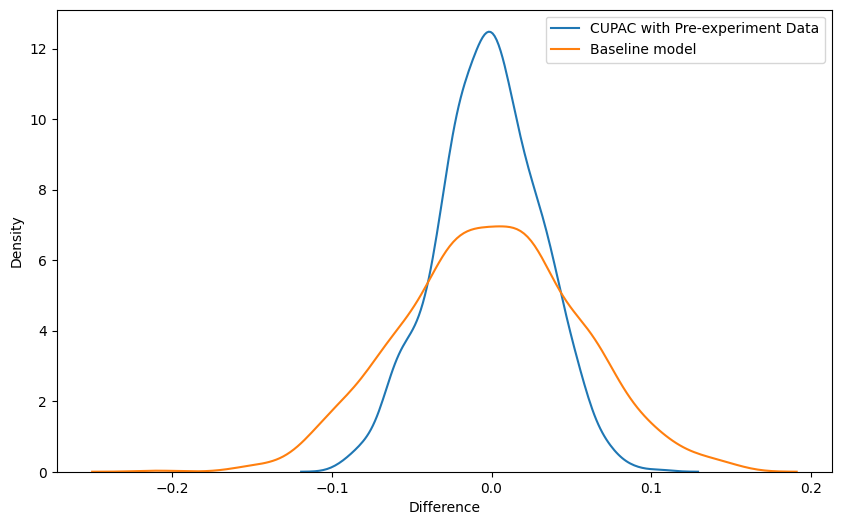

In [36]:
# Create a KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df_game_start_difference_cupac_pre_data_0[0], label='CUPAC with Pre-experiment Data')
sns.kdeplot(df_game_start_difference[0], label='Baseline model')


palette = sns.color_palette("tab20b", as_cmap=True)


# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
# plt.title('A/A Test Results comparison -  basline and post-stratification models')
plt.legend()

# Show the plot
plt.show()

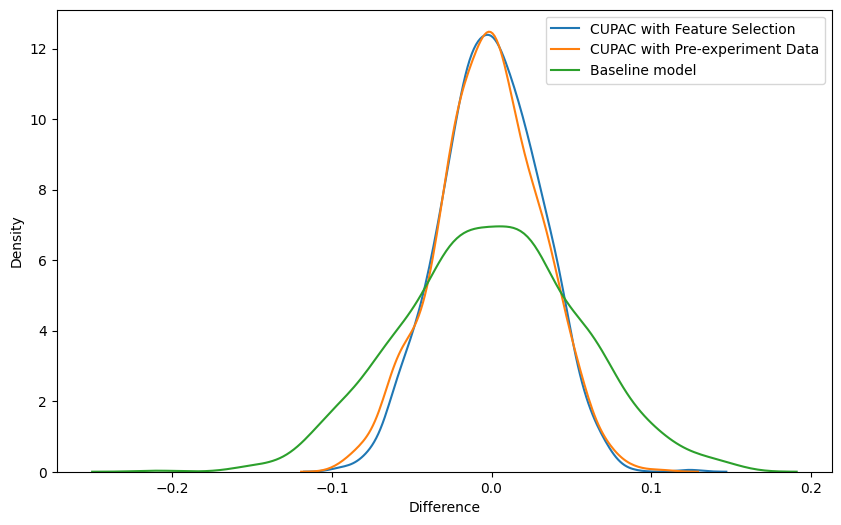

In [16]:
# Create a KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df_game_start_difference_cupac_feature_selection[0], label='CUPAC with Feature Selection')
sns.kdeplot(df_game_start_difference_cupac_pre_data_0[0], label='CUPAC with Pre-experiment Data')
sns.kdeplot(df_game_start_difference[0], label='Baseline model')


palette = sns.color_palette("tab20b", as_cmap=True)


# Add labels and title
plt.xlabel('Difference')
plt.ylabel('Density')
# plt.title('A/A Test Results comparison -  basline and post-stratification models')
plt.legend()

# Show the plot
plt.show()